In [1]:
import cv2
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Ejercicio 2.1

In [2]:
DATA_DIR = '../data/images/'

In [3]:
def img2vec(path, size=(64, 64)):
    image = cv2.imread(path)  
    image = cv2.resize(image, size)  
    vector = image.reshape(-1, image.shape[-1]) # Vector [R, G, B]
    return vector, image


In [4]:
(vaca, _), (cielo, _), (pasto, _) = [img2vec(os.path.join(DATA_DIR, f)) for f in os.listdir(DATA_DIR)]

In [5]:
vaca

array([[ 91, 142, 213],
       [ 98, 148, 215],
       [ 86, 135, 203],
       ...,
       [231, 240, 249],
       [223, 232, 242],
       [207, 216, 224]], dtype=uint8)

In [6]:
X = np.concatenate((vaca, cielo, pasto))
X

array([[ 91, 142, 213],
       [ 98, 148, 215],
       [ 86, 135, 203],
       ...,
       [216, 210, 199],
       [212, 208, 197],
       [213, 209, 198]], dtype=uint8)

In [7]:
y = np.array([0] * len(vaca) + [1] * len(cielo) + [2] * len(pasto)) # 0: vaca, 1: cielo, 2: pasto
y

array([0, 0, 0, ..., 2, 2, 2])

In [8]:
assert X.shape[0] == y.shape[0]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
c_values = [0.1, 2.0, 5.0]

predictions = []

for kernel in kernels:
    for c in c_values:
        # Create an SVM classifier
        clf = SVC(kernel=kernel, C=c, random_state=42) 
        
        # Train the model using the training sets
        clf.fit(X_train, y_train)

        # Predict the response for test dataset
        y_hat = clf.predict(X_test)

        # Confusion matrix
        cm = confusion_matrix(y_test, y_hat)
        
        # Accuracy
        accuracy = accuracy_score(y_test, y_hat)

        predictions.append({'kernel': kernel, 'c': c, 'accuracy': accuracy, 'confusion matrix': cm})

In [11]:
predictions

[{'kernel': 'linear',
  'c': 0.1,
  'accuracy': 0.9886086248982913,
  'confusion matrix': array([[834,   9,   1],
         [ 18, 792,   0],
         [  0,   0, 804]])},
 {'kernel': 'linear',
  'c': 2.0,
  'accuracy': 0.9886086248982913,
  'confusion matrix': array([[834,   9,   1],
         [ 18, 792,   0],
         [  0,   0, 804]])},
 {'kernel': 'linear',
  'c': 5.0,
  'accuracy': 0.9886086248982913,
  'confusion matrix': array([[834,   9,   1],
         [ 18, 792,   0],
         [  0,   0, 804]])},
 {'kernel': 'poly',
  'c': 0.1,
  'accuracy': 0.983726606997559,
  'confusion matrix': array([[835,   9,   0],
         [ 31, 779,   0],
         [  0,   0, 804]])},
 {'kernel': 'poly',
  'c': 2.0,
  'accuracy': 0.9890154597233524,
  'confusion matrix': array([[835,   9,   0],
         [ 18, 792,   0],
         [  0,   0, 804]])},
 {'kernel': 'poly',
  'c': 5.0,
  'accuracy': 0.9894222945484134,
  'confusion matrix': array([[835,   9,   0],
         [ 17, 793,   0],
         [  0,   0, 80

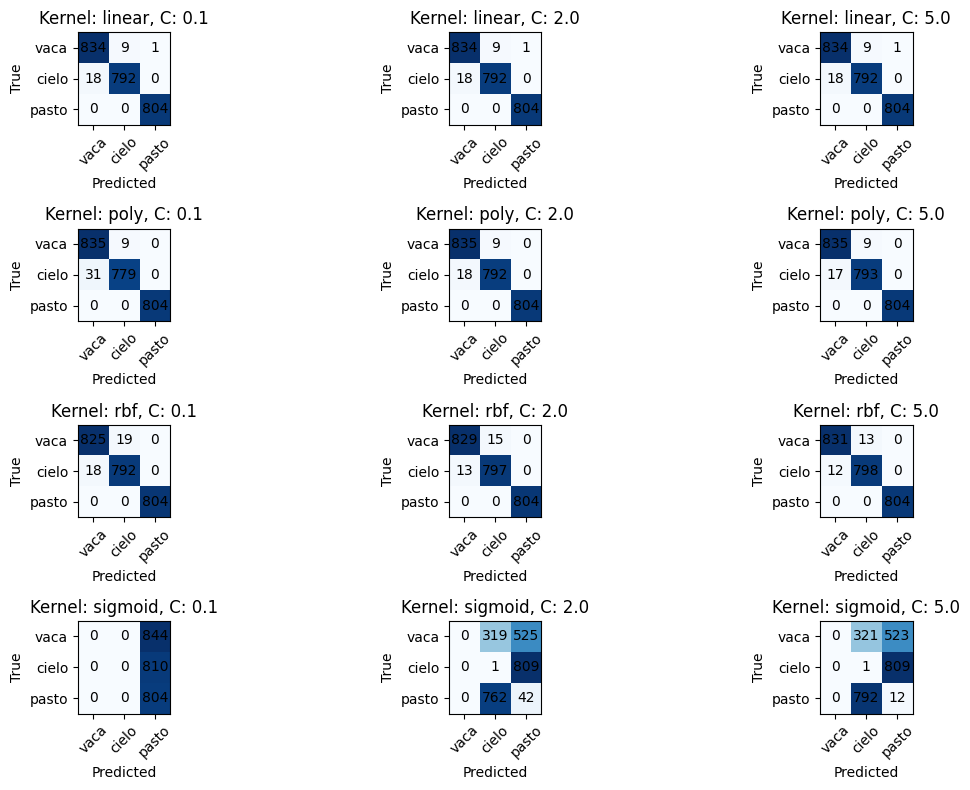

In [12]:
plt.figure(figsize=(12, 8))

labels = ["vaca", "cielo", "pasto"]

for i, pred in enumerate(predictions):
    kernel = pred['kernel']
    c = pred['c']
    cm = pred['confusion matrix']
    
    # Subplot for each kernel and C value
    plt.subplot(len(kernels), len(c_values), i + 1)
    
    # Title for each subplot
    plt.title(f'Kernel: {kernel}, C: {c}')
    
    # Visualize confusion matrix
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    
    # Add ticks to the plot
    plt.xticks(np.arange(len(labels)), labels, rotation=45)
    plt.yticks(np.arange(len(labels)), labels)
    
    # Add numbers to the plot
    for i in range(len(labels)):
        for j in range(len(labels)):
            plt.text(j, i, str(cm[i, j]), horizontalalignment='center', verticalalignment='center')
    
    # Add labels to the plot
    plt.xlabel('Predicted')
    plt.ylabel('True')

plt.tight_layout()
plt.show()


# Ejercicio 2.d

In [13]:
cow_vec, cow_img = img2vec('../data/cow.jpg', size=(300, 300))


In [14]:
cow_vec

array([[156, 140, 103],
       [155, 139, 102],
       [160, 146, 110],
       ...,
       [ 74,  62,  41],
       [ 67,  70,  47],
       [ 79,  82,  52]], dtype=uint8)

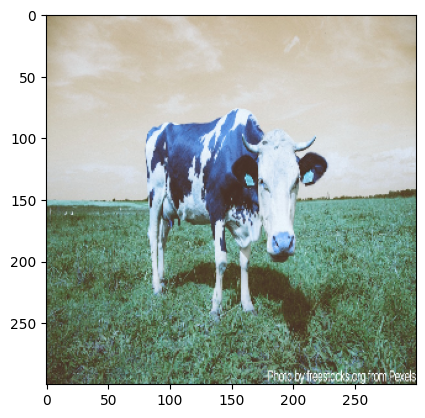

In [15]:
plt.imshow(cow_img)

In [16]:
clf = SVC(kernel='poly', C=0.1, random_state=42) # Create an SVM classifier given the best parameters (kernel and C value)

In [17]:
clf.fit(X_train, y_train)

SVC(C=0.1, kernel='poly', random_state=42)

In [18]:
y_hat = clf.predict(cow_vec)
y_hat

array([1, 1, 1, ..., 0, 1, 1])

In [19]:
colors = (np.array([255, 255, 255]), np.array([0, 0, 0]), np.array([127, 127, 127])) # Colors for each class, colors[0] = white, colors[1] = black, colors[2] = grey 0.5019607843137255

In [20]:
# Create a new image with the same size as the original one
# If y_hat[i] = 0, the pixel will be white
# If y_hat[i] = 1, the pixel will be black
# If y_hat[i] = 2, the pixel will be grey
new_image = np.array([colors[label] for label in y_hat])
new_image

array([[  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       ...,
       [255, 255, 255],
       [  0,   0,   0],
       [  0,   0,   0]])

In [21]:
assert new_image.shape == cow_vec.shape

In [22]:
new_image

array([[  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       ...,
       [255, 255, 255],
       [  0,   0,   0],
       [  0,   0,   0]])

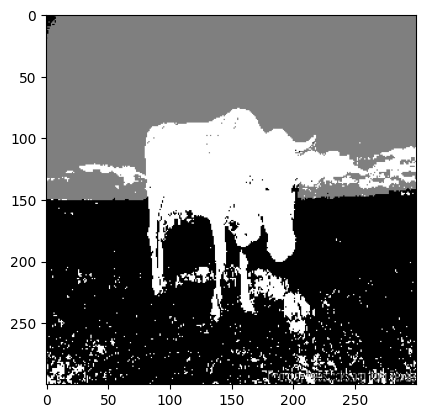

In [23]:
# Plot the new image
plt.imshow(new_image.reshape(cow_img.shape))

# Ejercicio 2.g

In [ ]:
cow_vec, cow_img = img2vec('../data/cow.jpg', size=(300, 300))
